**DATA DIRI**

**NAMA : MUHAMMAD ISMAIL**

**DOMISILI : SURABAYA, JAWA TIMUR**

**NLP PROJECT**

In [2]:
import tensorflow as tf
#mengecek version dari tensorflow
tf.__version__

'2.6.0'

**EKSTRAKSI FILE**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install kaggle

In [5]:
#mengupload API key akun kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mail2418","key":"784e529f058f35edd5174910c6d63425"}'}

In [6]:
# membuat directory dari kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
#download dataset
!kaggle datasets download -d hgultekin/bbcnewsarchive

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 59.7MB/s]


In [8]:
# unzip dan lihat list dataset
!mkdir bbcnewsarchive
!unzip bbcnewsarchive.zip -d bbcnewsdata

Archive:  bbcnewsarchive.zip
  inflating: bbcnewsdata/bbc-news-data.csv  


**MEMBUAT DATAFRAME**


In [9]:
#mengubah file csv yang didapatkan ke dataframe
#penambahan sep='\t' memudahkan mesin untuk membaca dataframe dan menghindari eror
df = pd.read_csv('bbcnewsdata/bbc-news-data.csv',sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [10]:
df.shape

(2225, 4)

**DATA CLEANING**

In [11]:
new_df = df.drop(columns=['filename'])
new_df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [12]:
#mengecek apakah ada yang null
new_df.isnull().sum()

category    0
title       0
content     0
dtype: int64

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   title     2225 non-null   object
 2   content   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


**VISUALISASI DATA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


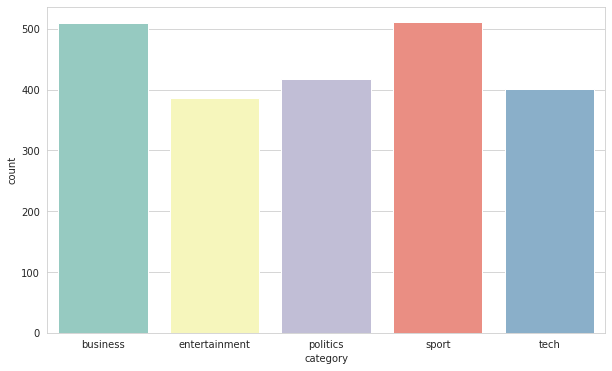

In [14]:
#bentuk bar
plt.figure(figsize =(10,6))
sns.set_style("whitegrid")
sns.countplot(new_df['category'], palette="Set3")

**ENCODING**

In [15]:
#mengambil kolom category
category = pd.get_dummies(new_df.category)
#one-hot-encoding kolom category
new_df = pd.concat([new_df,category],axis = 1)
#mengedrop kolom category
new_df = new_df.drop(columns=['category'])
new_df.tail(10)

,title,content,business,entertainment,politics,sport,tech
2215,Broadband fuels online expression,Fast web access is encouraging more people to...,0,0,0,0,1
2216,Savvy searchers fail to spot ads,Internet search engine users are an odd mix o...,0,0,0,0,1
2217,TV's future down the phone line,Internet TV has been talked about since the s...,0,0,0,0,1
2218,Cebit fever takes over Hanover,Thousands of products and tens of thousands o...,0,0,0,0,1
2219,New consoles promise big problems,Making games for future consoles will require...,0,0,0,0,1
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1
2224,Losing yourself in online gaming,"Online role playing games are time-consuming,...",0,0,0,0,1


In [65]:
new_df.head()

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0


**IMPORT TOKENIZER DAN SCIKITLEARN SERTA BERBAGAI KOMPONEN PENTING LAIN**


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

**MEMBUAT LABEL DAN FEATURE**

In [17]:
label = new_df[["business", "entertainment", "politics", "sport", "tech"]].values
content = new_df['title'].values + '' + new_df['content'].values

In [18]:
content

array(['Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [19]:
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [83]:
#membagi data train dan data test
content_train, content_test, label_train, label_test = train_test_split(content,label,test_size=.2)

#membuat model tokenizer
tokenizer = Tokenizer(num_words= 12000, oov_token= "<OOV>")

#melatih tokenizer dengan data train
tokenizer.fit_on_texts(content_train)
sekuens_latih = tokenizer.texts_to_sequences(content_train)
padded_latih = pad_sequences(sekuens_latih, maxlen = 300, truncating='post') 

#membuat sequence dan padding dari data testing
sekuens_test = tokenizer.texts_to_sequences(content_test)
padded_test = pad_sequences(sekuens_test, maxlen = 300, truncating='post') 

In [86]:
padded_test.shape

(445, 300)

In [85]:
padded_latih.shape

(1780, 300)

In [87]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=12000, output_dim= 64, input_length = 300),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(5, activation='softmax')
     ])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 64)           768000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 325       
Total params: 879,557
Trainable params: 879,557
Non-trainable params: 0
_______________________________________________

In [88]:
#membuat callback agar menghentikan epoch bila akurasi sesuai dengan yang diinginkan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >0.98 and logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [89]:
Predict = model.fit(
    padded_latih,
    label_train, 
    epochs = 50, 
    validation_data = (padded_test, label_test), 
    verbose = 2, 
    callbacks =[callbacks],
    validation_steps = 30
)

Epoch 1/50
56/56 - 92s - loss: 1.6115 - accuracy: 0.2230 - val_loss: 1.6898 - val_accuracy: 0.1753
Epoch 2/50
56/56 - 22s - loss: 1.4465 - accuracy: 0.3360 - val_loss: 1.1507 - val_accuracy: 0.5618
Epoch 3/50
56/56 - 22s - loss: 0.9242 - accuracy: 0.5657 - val_loss: 0.8864 - val_accuracy: 0.6292
Epoch 4/50
56/56 - 22s - loss: 0.6040 - accuracy: 0.7180 - val_loss: 0.6448 - val_accuracy: 0.6989
Epoch 5/50
56/56 - 22s - loss: 0.5961 - accuracy: 0.7742 - val_loss: 0.8396 - val_accuracy: 0.6427
Epoch 6/50
56/56 - 22s - loss: 0.2685 - accuracy: 0.8770 - val_loss: 0.6233 - val_accuracy: 0.8472
Epoch 7/50
56/56 - 22s - loss: 0.1429 - accuracy: 0.9601 - val_loss: 0.4597 - val_accuracy: 0.8876
Epoch 8/50
56/56 - 22s - loss: 0.0392 - accuracy: 0.9921 - val_loss: 0.5546 - val_accuracy: 0.8989
Epoch 9/50
56/56 - 22s - loss: 0.1057 - accuracy: 0.9803 - val_loss: 0.7739 - val_accuracy: 0.8337
Epoch 10/50
56/56 - 22s - loss: 0.0396 - accuracy: 0.9899 - val_loss: 0.6918 - val_accuracy: 0.8000
Epoch 11/

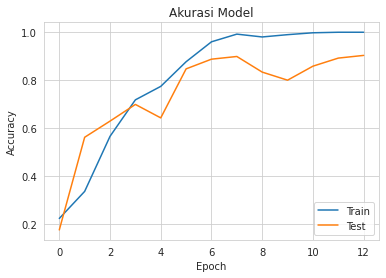

In [95]:
plt.plot(Predict.history['accuracy'])
plt.plot(Predict.history['val_accuracy'])
plt.title('Akurasi Model')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

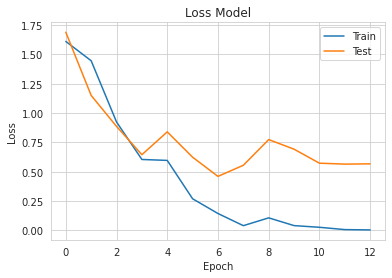

In [96]:
plt.plot(Predict.history['loss'])
plt.plot(Predict.history['val_loss'])
plt.title('Loss Model')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()